In [1]:
import pickle
import numpy as np
import pandas as pd 
from scipy.ndimage import gaussian_filter1d
import pingouin as pg 
from tabulate import tabulate


import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

import sys 
sys.path.append("..") 
from utils.bms import fit_bms
from utils.viz import viz
from utils.analyze import build_pivot_table
viz.get_style()

In [11]:
# fit performance 
def quantTable(data_set, agents= ['MOS', 'FLR', 'RP']):
    crs = {}
    n_param =[18, 15, 9, 6, 6, 3]
    ticks = [f'{m}({n})' for n, m in zip(n_param, agents)]

    for m in agents: 
        fname = f'../fits/{data_set}/params-{data_set}-{m}-bms-ind.csv'
        data  = pd.read_csv(fname)
        nll   = -data.loc[0, 'log_like']
        aic   = data.loc[0, 'aic']
        bic   = data.loc[0, 'bic']
        crs[m] = {'NLL': nll, 'AIC': aic, 'BIC': bic}

    for n, m in zip(n_param, agents):
        print(f'{m}({n}) nll: {crs[m]["NLL"]:.3f}, aic: {crs[m]["AIC"]:.3f}, bic: {crs[m]["BIC"]:.3f}')

    fig, axs = plt.subplots(3, 1, figsize=(6, 11))
    xx = list(range(len(agents)))
    for i, c in enumerate(['NLL', 'AIC', 'BIC']):
        cr = np.array([crs[m][c] for m in agents])
        cr -= cr.min()
        ax = axs[i]
        sns.barplot(x=xx, y=cr, palette=viz.Palette[:len(agents)], ax=ax)
        ax.set_xticks(xx)
        ax.set_xticklabels(ticks, rotation=30, fontsize=13)
        ax.set_xlim([0-.8, len(agents)-1+.8])
        ax.set_ylabel(r'$\Delta$'+f'{c}')
        plt.tight_layout()

In [15]:
def show_bms(data_set, models = ['MOS', 'FLR', 'RP', 'MOS_fix', 'FLR_fix', 'RP_fix'], 
             n_param =[18, 15, 9, 6, 6, 3]):
    '''group-level bayesian model selection
    '''
    
    ticks = [f'{m}({n})' for n, m in zip(n_param, models)]
    fit_sub_info = []

    for i, m in enumerate(models):
        with open(f'../fits/{data_set}/fit_sub_info-{m}-bms.pkl', 'rb')as handle:
            fit_info = pickle.load(handle)
        # get the subject list 
        if i==0: subj_lst = fit_info.keys() 
        # get log post
        log_post = [fit_info[idx]['log_post'] for idx in subj_lst]
        bic      = [fit_info[idx]['bic'] for idx in subj_lst]
        h        = [fit_info[idx]['H'] for idx in subj_lst]
        n_param  = fit_info[list(subj_lst)[0]]['n_param']
        fit_sub_info.append({
            'log_post': log_post, 
            'bic': bic, 
            'n_param': n_param, 
            'H': h
        })

    bms_results = fit_bms(fit_sub_info)

    # show protected exceedence 
    _, ax = plt.subplots(1, 1, figsize=(5, 4))
    xx = list(range(len(models)))
    sns.barplot(x=xx, y=bms_results['pxp'], palette=viz.Palette[:len(models)], ax=ax)
    ax.set_xticks(xx)
    ax.set_xticklabels(ticks, rotation=30, fontsize=13)
    ax.set_xlim([0-.8, len(models)-1+.8])
    ax.set_ylabel('PXP')
    plt.tight_layout()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


MOS(18) nll: 156.879, aic: 349.758, bic: 418.999
FLR(15) nll: 163.310, aic: 356.619, bic: 414.320
RP(9) nll: 174.883, aic: 367.766, bic: 402.386
MOS_fix(6) nll: 169.774, aic: 351.548, bic: 374.629


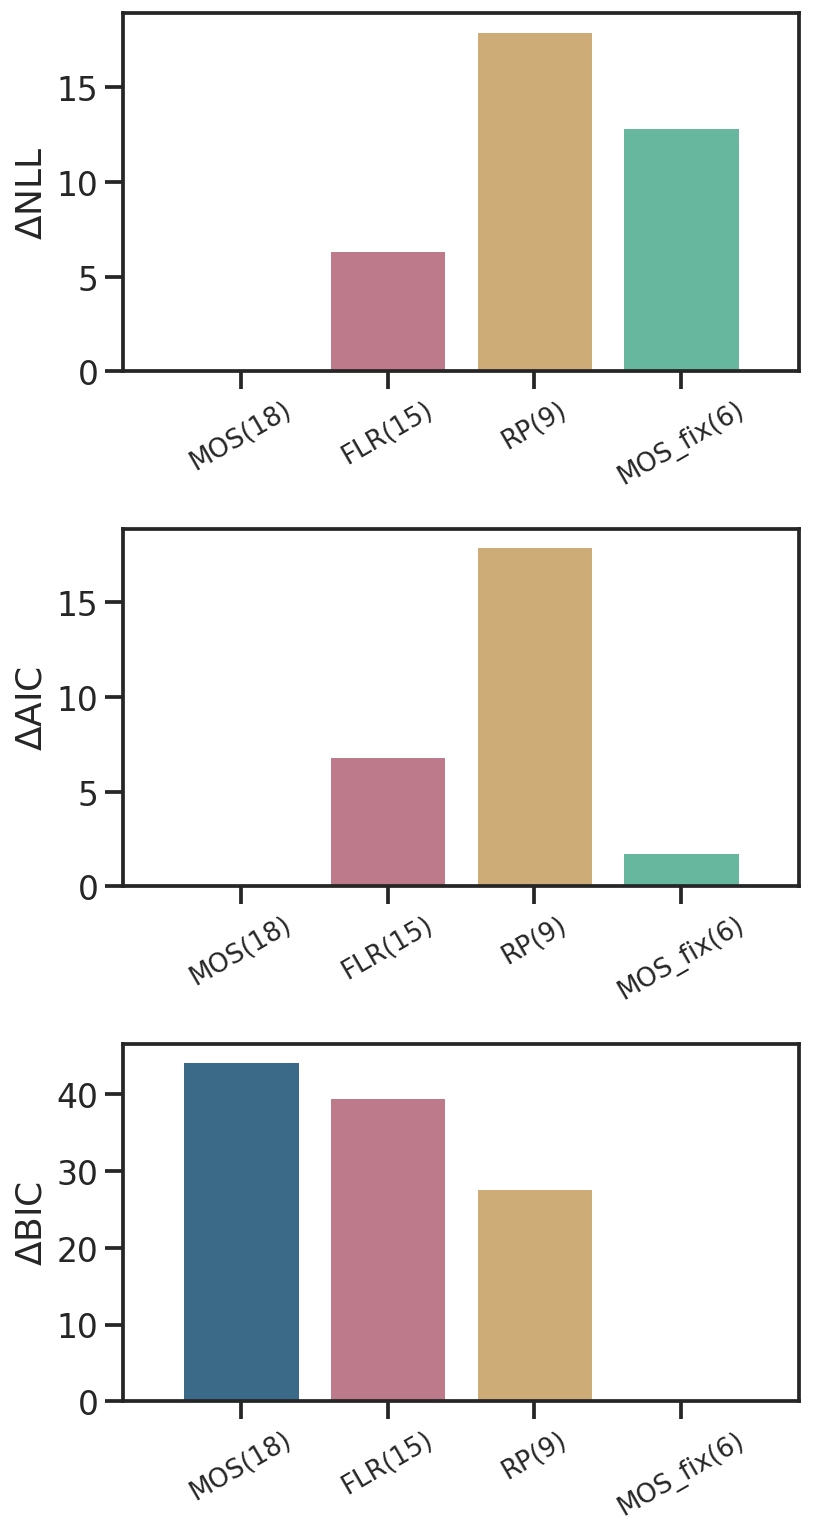

In [12]:
quantTable('exp1data', agents=['MOS', 'FLR', 'RP', 'MOS_fix'])

## Recover MOS

MOS(18) nll: 496.981, aic: 1029.963, bic: 1116.406
FLR(15) nll: 497.197, aic: 1024.394, bic: 1096.430
RP(9) nll: 530.975, aic: 1079.949, bic: 1123.170
MOS_fix(6) nll: 501.751, aic: 1015.502, bic: 1044.316


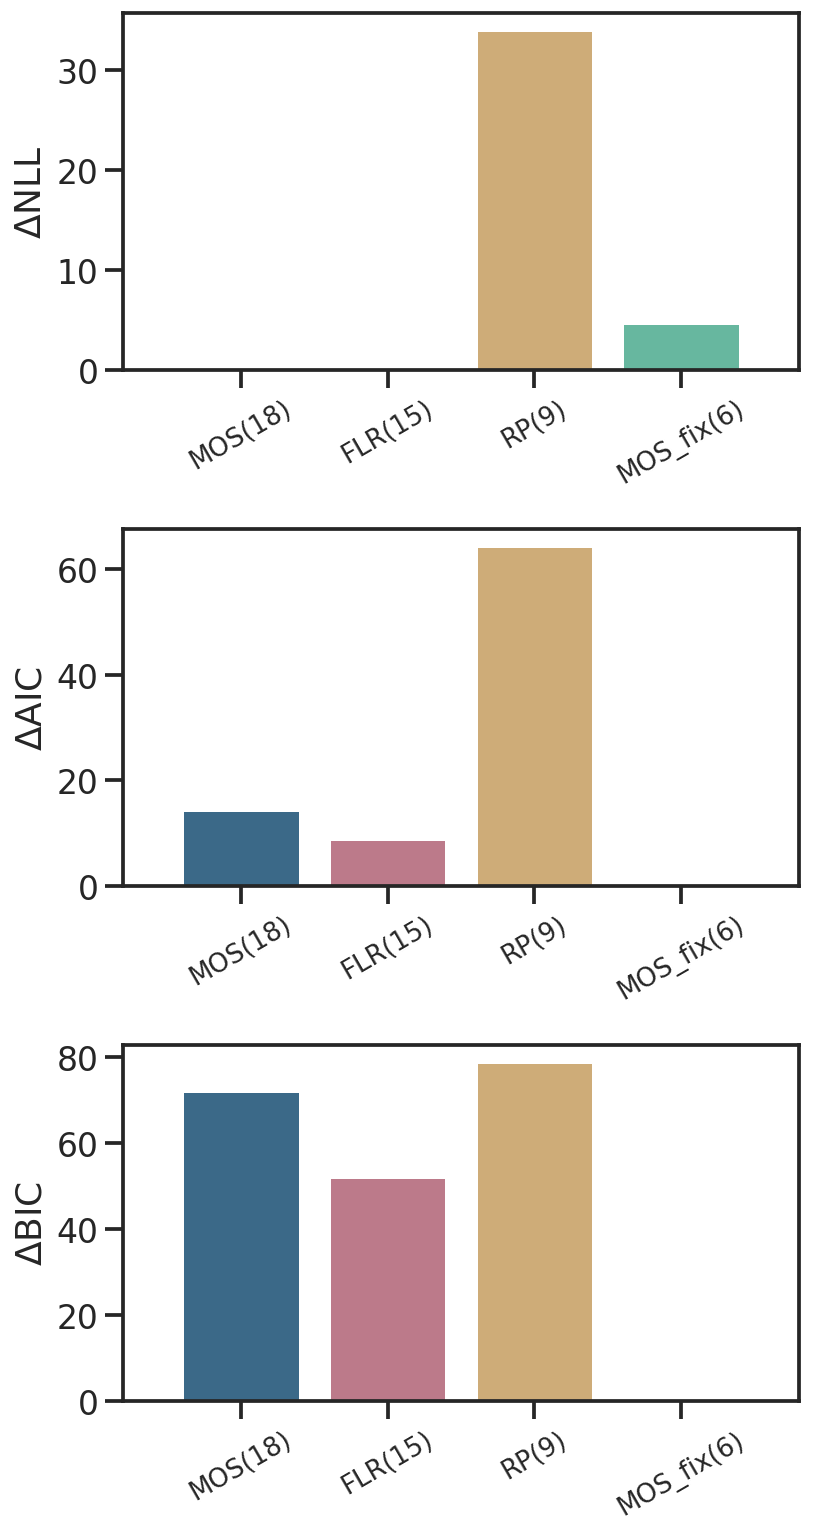

In [13]:
quantTable('exp1data-MOS', agents=['MOS', 'FLR', 'RP', 'MOS_fix'])

In [17]:
show_bms('exp1data-MOS', models=['MOS', 'FLR', 'RP', 'MOS_fix'])

FileNotFoundError: [Errno 2] No such file or directory: 'fits/exp1data-MOS/fit_sub_info-MOS-bms.pkl'